Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.945513 (0.060355)
GNB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


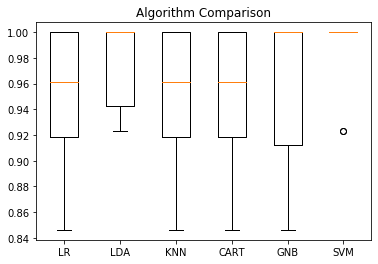

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [2]:
#Python version
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)


#Class distribution
print(dataset.groupby('class').size())

#box and whisker plots
#dataset.plot(kind = 'box', subplots = True, layout=(2,2), sharex = False, sharey = False)
#pyplot.show()

#histograms
#dataset.hist()
#pyplot.show()

#scatter plot matrix
#scatter_matrix(dataset)
#pyplot.show()


#Split-out validation dataset
array = dataset.values

#Slice NumPy array
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

#10-fold cross validation to estimate different model's accuracy
#This splits the dataset into 10 parts, train on 9 and test on 1
#Then repeats for all combinations of train-test splits
# Review this link for more about k-fold cross-validation
#https://machinelearningmastery.com/k-fold-cross-validation/

#It is a stratified cross validation because for each fold or split the
#dataset will aim to have the same distribution of example by class

models = []

#Spot Check Log Regression accuracy (LR)
#Linear Algos
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

#Spot Check Linear Discriminant Analysis (LDA)
models.append(('LDA', LinearDiscriminantAnalysis()))

#NonLinear Algos
#Spot Check K-Nearest Neighbors (KNN)
models.append(('KNN', KNeighborsClassifier()))

#Spot Check Classification and Regression Trees(CART)
models.append(('CART', DecisionTreeClassifier()))

#Spot Check Gaussian Naive Bayes (GNB)
models.append(('GNB', GaussianNB()))

#Spot Check Support Vector Machines (SVM)
models.append(('SVM', SVC(gamma='auto')))

#Loop to evaluate each model
results = []
names = []

for name, model in models:
    kfold=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

#Algorithm Comparison Visual
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()



# Make Predictions on the validation dataset
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

# Evaluate predictions
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

